In [1]:
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Boston.csv')
df

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.70,7.12,27.5
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.60,27.71,13.2
2,very_low,82.5,2.03,0,0.415,6.162,38.4,6.2700,2.0,348,14.7,393.77,7.43,24.1
3,low,0.0,21.89,0,0.624,6.151,97.9,1.6687,4.0,437,21.2,396.90,18.46,17.8
4,high,0.0,18.10,0,0.614,6.980,67.6,2.5329,24.0,666,20.2,374.68,11.66,29.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,high,0.0,18.10,0,0.740,6.219,100.0,2.0048,24.0,666,20.2,395.69,16.59,18.4
96,high,0.0,18.10,0,0.655,5.759,48.2,3.0665,24.0,666,20.2,334.40,14.13,19.9
97,high,0.0,18.10,0,0.671,6.380,96.2,1.3861,24.0,666,20.2,396.90,23.69,13.1
98,low,0.0,9.90,0,0.544,5.914,83.2,3.9986,4.0,304,18.4,390.70,18.33,17.8


In [3]:
df['CRIME'].value_counts()

very_low    50
low         25
high        25
Name: CRIME, dtype: int64

In [4]:
crime = pd.get_dummies(df['CRIME'], drop_first = True)
df2 = pd.concat([df, crime], axis = 1)
df2 = df2.drop(['CRIME'],axis=1)
df2

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.70,7.12,27.5,0,0
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.60,27.71,13.2,1,0
2,82.5,2.03,0,0.415,6.162,38.4,6.2700,2.0,348,14.7,393.77,7.43,24.1,0,1
3,0.0,21.89,0,0.624,6.151,97.9,1.6687,4.0,437,21.2,396.90,18.46,17.8,1,0
4,0.0,18.10,0,0.614,6.980,67.6,2.5329,24.0,666,20.2,374.68,11.66,29.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,18.10,0,0.740,6.219,100.0,2.0048,24.0,666,20.2,395.69,16.59,18.4,0,0
96,0.0,18.10,0,0.655,5.759,48.2,3.0665,24.0,666,20.2,334.40,14.13,19.9,0,0
97,0.0,18.10,0,0.671,6.380,96.2,1.3861,24.0,666,20.2,396.90,23.69,13.1,0,0
98,0.0,9.90,0,0.544,5.914,83.2,3.9986,4.0,304,18.4,390.70,18.33,17.8,1,0


In [5]:
train_val, test = train_test_split(df2, test_size=0.2, random_state = 0)

In [6]:
train_val.isna().sum()

ZN          0
INDUS       0
CHAS        0
NOX         1
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
low         0
very_low    0
dtype: int64

In [7]:
train_val_mean = train_val.mean()
train_val2 = train_val.fillna(train_val_mean)

In [8]:
train_val2.isna().sum()

ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
low         0
very_low    0
dtype: int64

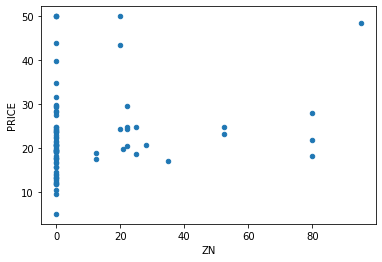

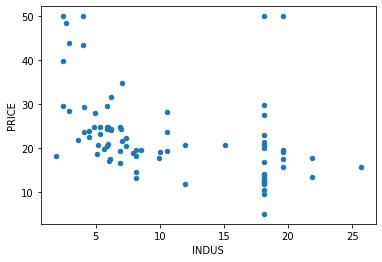

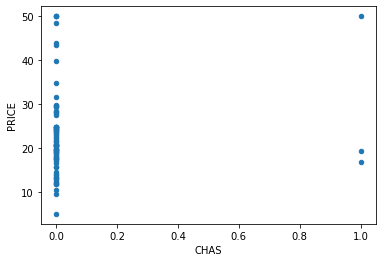

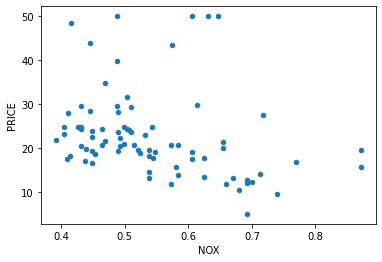

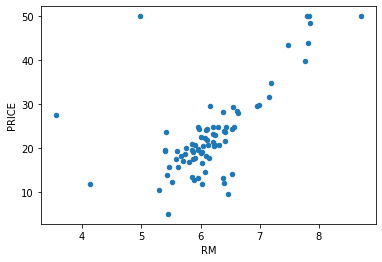

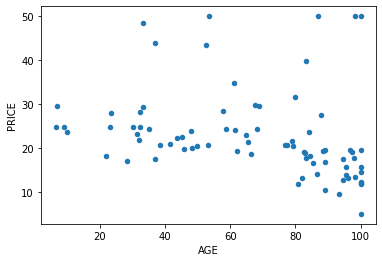

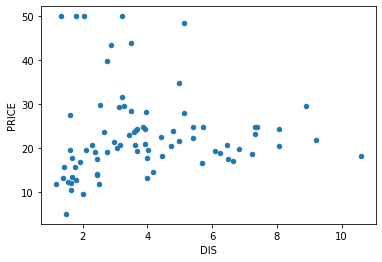

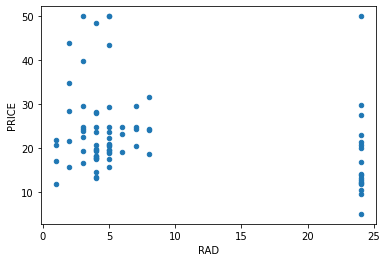

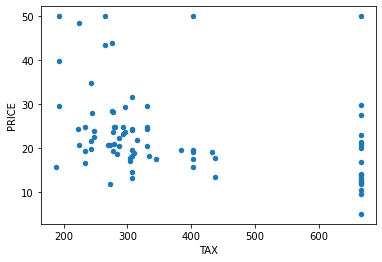

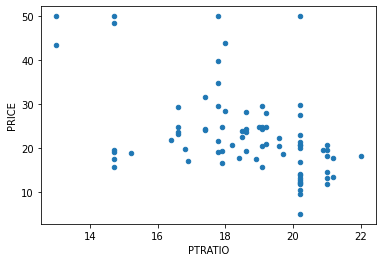

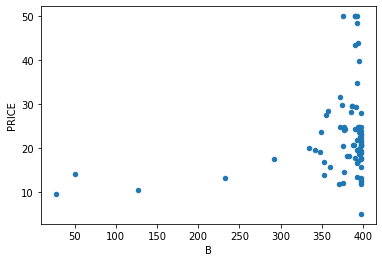

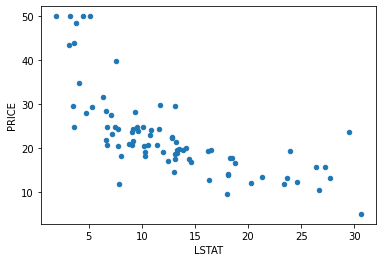

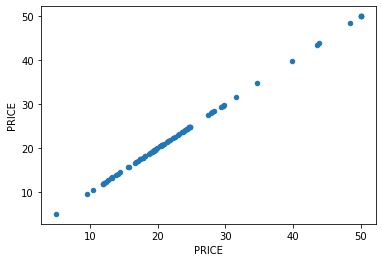

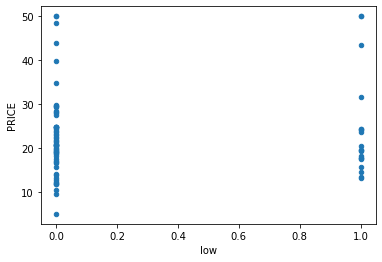

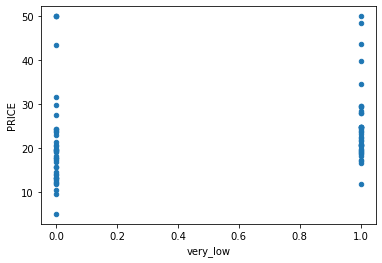

In [9]:
colname = train_val.columns

for name in colname:
    train_val2.plot(kind='scatter', x= name, y = 'PRICE')

In [10]:
out_line1 = train_val2[(train_val2['RM'] < 6) & (train_val2['PRICE'] > 40)].index
out_line2 = train_val2[(train_val['PTRATIO'] > 18) & (train_val['PRICE'] > 40)].index

print(out_line1, out_line2)

Int64Index([76], dtype='int64') Int64Index([76], dtype='int64')


In [11]:
train_val3 = train_val2.drop([76], axis=0)

In [12]:
col = ['INDUS','NOX','RM','PTRATIO','LSTAT','PRICE']

train_val4 = train_val3[col]
train_val4.head(3)

,INDUS,NOX,RM,PTRATIO,LSTAT,PRICE
43,5.86,0.431,6.108,19.1,9.16,24.3
62,5.86,0.431,6.957,19.1,3.53,29.6
3,21.89,0.624,6.151,21.2,18.46,17.8


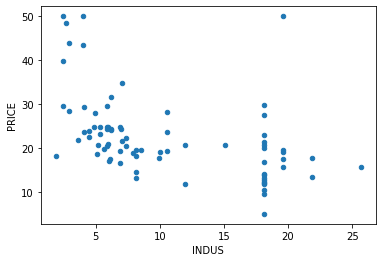

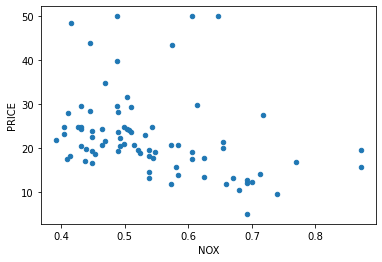

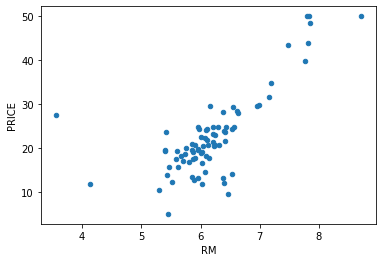

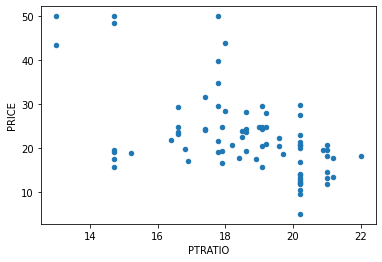

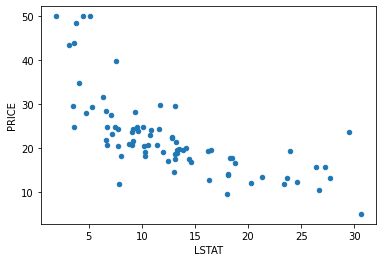

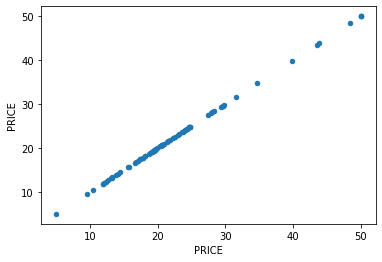

In [13]:
colname = train_val4.columns

for i in colname:
    train_val4.plot(kind = 'scatter', x = i, y = 'PRICE')

In [14]:
train_val4.corr()

,INDUS,NOX,RM,PTRATIO,LSTAT,PRICE
INDUS,1.000000,0.785722,-0.403129,0.249438,0.578406,-0.470889
NOX,0.785722,1.000000,-0.272996,0.077533,0.484295,-0.325289
RM,-0.403129,-0.272996,1.000000,-0.404568,-0.560454,0.753771
PTRATIO,0.249438,0.077533,-0.404568,1.000000,0.326563,-0.542449
LSTAT,0.578406,0.484295,-0.560454,0.326563,1.000000,-0.693490
PRICE,-0.470889,-0.325289,0.753771,-0.542449,-0.693490,1.000000


In [15]:
train_cor = train_val4.corr()['PRICE']
train_cor

INDUS     -0.470889
NOX       -0.325289
RM         0.753771
PTRATIO   -0.542449
LSTAT     -0.693490
PRICE      1.000000
Name: PRICE, dtype: float64

In [16]:
se = pd.Series([1,-2,3,-4])
se.map(abs)

0    1
1    2
2    3
3    4
dtype: int64

In [17]:
abs_cor = train_cor.map(abs)
abs_cor

INDUS      0.470889
NOX        0.325289
RM         0.753771
PTRATIO    0.542449
LSTAT      0.693490
PRICE      1.000000
Name: PRICE, dtype: float64

In [18]:
abs_cor.sort_values(ascending = False)

PRICE      1.000000
RM         0.753771
LSTAT      0.693490
PTRATIO    0.542449
INDUS      0.470889
NOX        0.325289
Name: PRICE, dtype: float64

In [19]:
col = ['RM','LSTAT','PTRATIO']

x = train_val4[col]
t = train_val4[['PRICE']]

x_train, x_val, y_train, y_val = train_test_split(x,t, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler

sc_model_x = StandardScaler()
sc_model_x.fit(x_train)
sc_x = sc_model_x.transform(x_train)
sc_x

array([[-0.10238334, -0.89546338, -0.97250163],
       [-0.11741281, -0.37386886,  1.21732721],
       [-0.92274224,  2.49984836,  0.83648742],
       [ 1.60346221, -1.37747891, -2.59107078],
       [-0.21134704, -0.36821472, -0.30603198],
       [ 0.28337322, -0.54632017, -0.87729168],
       [ 2.01927772, -1.55275729, -1.7817862 ],
       [-0.42551707, -0.58448562,  0.36043767],
       [-0.39420567,  0.21557535, -1.7817862 ],
       [-0.21886178, -0.00634969,  0.02720284],
       [-0.48438252,  0.24525959,  0.83648742],
       [ 0.02411475,  0.04453758,  0.83648742],
       [ 0.31092726, -1.31669689,  0.31283269],
       [ 2.08315299, -1.28559912, -1.7817862 ],
       [-0.98411261,  1.56550154,  0.07480782],
       [-0.28398951,  0.07704889, -0.78208173],
       [-0.9039554 ,  1.91040415, -1.7817862 ],
       [ 0.23828479,  1.52450902,  0.83648742],
       [-0.12993738, -0.28622968, -0.49645188],
       [-0.18629791, -0.73573389,  0.55085757],
       [-0.37917619,  0.48697412,  0.836

In [21]:
tmp_df = pd.DataFrame(sc_x, columns = x_train.columns)

tmp_df.mean()

RM        -3.559763e-16
LSTAT      1.727014e-16
PTRATIO   -1.436241e-16
dtype: float64

In [22]:
tmp_df.std()

RM         1.008032
LSTAT      1.008032
PTRATIO    1.008032
dtype: float64

In [23]:
sc_model_y = StandardScaler()
sc_model_y.fit(y_train)

sc_y = sc_model_y.transform(y_train)

In [24]:
model = LinearRegression()

model.fit(sc_x, sc_y)

LinearRegression()

In [25]:
model.score(x_val,y_val)

-13.08504437504009

In [26]:
sc_x_val = sc_model_x.transform(x_val)
sc_y_val = sc_model_y.transform(y_val)

model.score(sc_x_val, sc_y_val)

0.7359028880290996

In [27]:
def learn(x, t):
    x_train, x_val, y_train, y_val = train_test_split(x, t, test_size = 0.2,random_state = 0)
    
    sc_model_x = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_x.fit(x_train)
    sc_x_train = sc_model_x.transform(x_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)
    
    model = LinearRegression()
    model.fit(sc_x_train, sc_y_train)
    
    sc_x_val = sc_model_x.transform(x_val)
    sc_y_val = sc_model_y.transform(y_val)
    
    train_score = model.score(sc_x_train, sc_y_train)
    val_score = model.score(sc_x_val, sc_y_val)
    
    return train_score, val_score

In [28]:
x = train_val3.loc[:, ['RM', 'LSTAT', 'PTRATIO']]
t = train_val3[['PRICE']]

s1,s2 = learn(x, t)
print(s1, s2)

0.7175897572515981 0.7359028880290996


In [31]:
x['RM2'] = x['RM']**2

x.head(3)

,RM,LSTAT,PTRATIO,RM2
43,6.108,9.16,19.1,37.307664
62,6.957,3.53,19.1,48.399849
3,6.151,18.46,21.2,37.834801


In [ ]:
x

In [32]:
s1, s2 = learn(x, t)
print(s1, s2)

0.8456207631185567 0.8372526287986775


In [33]:
x['LSTAT2'] = x['LSTAT'] ** 2
s1, s2 = learn(x, t)
print(s1, s2)

x['PTRATIO2'] = x['PTRATIO'] ** 2
s1, s2 = learn(x, t)
print(s1, s2)

0.8565689444345093 0.8425282632102127
0.864383498898444 0.8678022326740727


In [34]:
x

,RM,LSTAT,PTRATIO,RM2,LSTAT2,PTRATIO2
43,6.108,9.16,19.1,37.307664,83.9056,364.81
62,6.957,3.53,19.1,48.399849,12.4609,364.81
3,6.151,18.46,21.2,37.834801,340.7716,449.44
71,6.108,6.57,16.4,37.307664,43.1649,268.96
45,5.963,13.45,16.8,35.557369,180.9025,282.24
...,...,...,...,...,...,...
96,5.759,14.13,20.2,33.166081,199.6569,408.04
67,6.310,6.75,20.2,39.816100,45.5625,408.04
64,6.249,10.59,18.2,39.050001,112.1481,331.24
47,6.625,6.65,18.0,43.890625,44.2225,324.00


In [35]:
x['RM * LSTAT'] = x['RM'] * x['LSTAT']
x.head(3)

,RM,LSTAT,PTRATIO,RM2,LSTAT2,PTRATIO2,RM * LSTAT
43,6.108,9.16,19.1,37.307664,83.9056,364.81,55.94928
62,6.957,3.53,19.1,48.399849,12.4609,364.81,24.55821
3,6.151,18.46,21.2,37.834801,340.7716,449.44,113.54746


In [36]:
s1, s2 =learn(x, t)
print(s1, s2)

0.8668534967796696 0.873934735777597


In [37]:
sc_model_x2 = StandardScaler()
sc_model_x2.fit(x)
sc_x = sc_model_x2.transform(x)

sc_model_y2 = StandardScaler()
sc_model_y2.fit(t)
sc_y = sc_model_y2.transform(t)
model = LinearRegression()
model.fit(sc_x, sc_y)

LinearRegression()

In [38]:
test2 = test.fillna(train_val.mean())
x_test = test2.loc[:, ['RM','LSTAT','PTRATIO']]
y_test = test2[['PRICE']]

x_test['RM2'] = x_test['RM'] ** 2
x_test['LSTAT2'] = x_test['LSTAT'] **2
x_test['PTRATIO2'] = x_test['PTRATIO'] **2
x_test['RM * LSTAT'] = x_test['RM'] * x_test['LSTAT']

sc_x_test = sc_model_x2.transform(x_test)
sc_y_test = sc_model_y2.transform(y_test)

In [39]:
model.score(sc_x_test, sc_y_test)

0.764924935366907

In [40]:
import pickle
with open('boston.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('boston_scx.pkl', 'wb') as f:
    pickle.dump(sc_model_x2, f)
with open('boston_scy.pkl','wb') as f:
    pickle.dump(sc_model_y2, f)

In [1]:
!git init

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone             Clone a repository into a new directory
   init              Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add               Add file contents to the index
   mv                Move or rename a file, a directory, or a symlink
   restore           Restore working tree files
   rm                Remove files from the working tree and from the index
   sparse-checkout   Initialize and modify the sparse-checkout

examine the history and state (see also: git help revisio